In [1237]:
#Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [1238]:
# Reading whale returns
whale_returns_csv = Path("./whale_returns.csv")
whale_returns_pd = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whale_returns_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [1239]:
# Count nulls
whale_returns_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1240]:
# Drop nulls
whale_returns_pd.dropna(inplace=True)
whale_returns_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [1241]:
# Reading algorithmic returns
algo_returns_csv = Path("./algo_returns.csv")
algo_returns_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_returns_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [1242]:
# Count nulls
algo_returns_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [1243]:
# Drop nulls
algo_returns_pd.dropna(inplace=True)
algo_returns_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data.

In [1244]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("./sp_tsx_history.csv")
sp_tsx_history_pd = pd.read_csv(sp_tsx_history_csv,index_col="Date", parse_dates=True)
 # Check Data Types
type(sp_tsx_history_pd)

pandas.core.frame.DataFrame

In [1245]:
sp_tsx_history_pd.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [1246]:
# Fix Data Types, removing '$'
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].str.replace('$','')
sp_tsx_history_pd.head()

/var/folders/85/f3jl8zy53r7152r9mnhclkvm0000gn/T/ipykernel_78837/721787276.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].str.replace('$','')


,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [1247]:
#Fix Data Types, removing the '.'
sp_tsx_history_pd = pd.concat([sp_tsx_history_pd[col].str.split()
                       .str[0]
                       .str.replace(',','').astype(float) for col in sp_tsx_history_pd], axis=1)

sp_tsx_history_pd['Close'] = sp_tsx_history_pd['Close'].astype(int)
print (sp_tsx_history_pd)

            Close
Date             
2012-10-01  12370
2012-10-02  12391
2012-10-03  12359
2012-10-04  12447
2012-10-05  12418
...           ...
2019-12-20  17118
2019-12-23  17128
2019-12-24  17180
2019-12-27  17168
2019-12-30  17098

[1818 rows x 1 columns]


In [1248]:
#Fix Data Types
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].astype('int64')
sp_tsx_history_pd.info()

# Calculate Daily Returns
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].pct_change()
sp_tsx_history_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   1818 non-null   int64
dtypes: int64(1)
memory usage: 28.4 KB


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001698
2012-10-03,-0.002583
2012-10-04,0.007120
2012-10-05,-0.002330


In [1249]:
# Drop nulls
sp_tsx_history_pd.dropna(inplace=True)
sp_tsx_history_pd.isnull().sum()

Close    0
dtype: int64

In [1250]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_pd.columns = ["S&P TSX 60"]
sp_tsx_history_pd.head()

,S&P TSX 60
Date,
2012-10-02,0.001698
2012-10-03,-0.002583
2012-10-04,0.007120
2012-10-05,-0.002330
2012-10-09,-0.011677


Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [1251]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns_pd,sp_tsx_history_pd,algo_returns_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.008582,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.003370,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001392,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.009998,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.006554,-0.005447,0.001303


Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios. 

Performance Analysis

Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

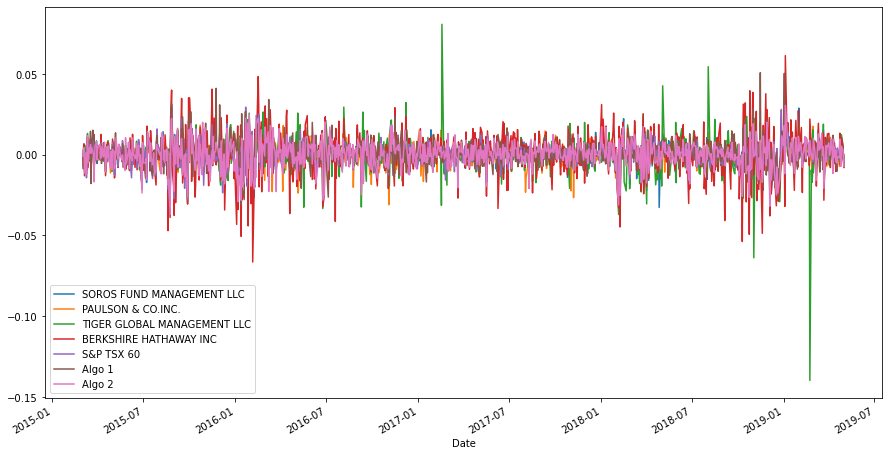

In [1252]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

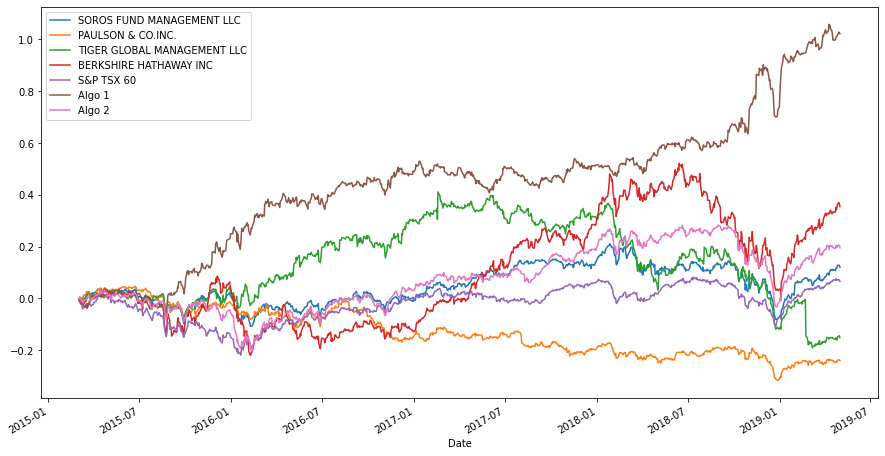

In [1253]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_returns).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,8))

Risk Analysis

Determine the risk of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
3. Determine which portfolios are riskier than the S&P TSX 60.
4. Calculate the Annualized Standard Deviation.

Create a box plot for each portfolio

<AxesSubplot:>

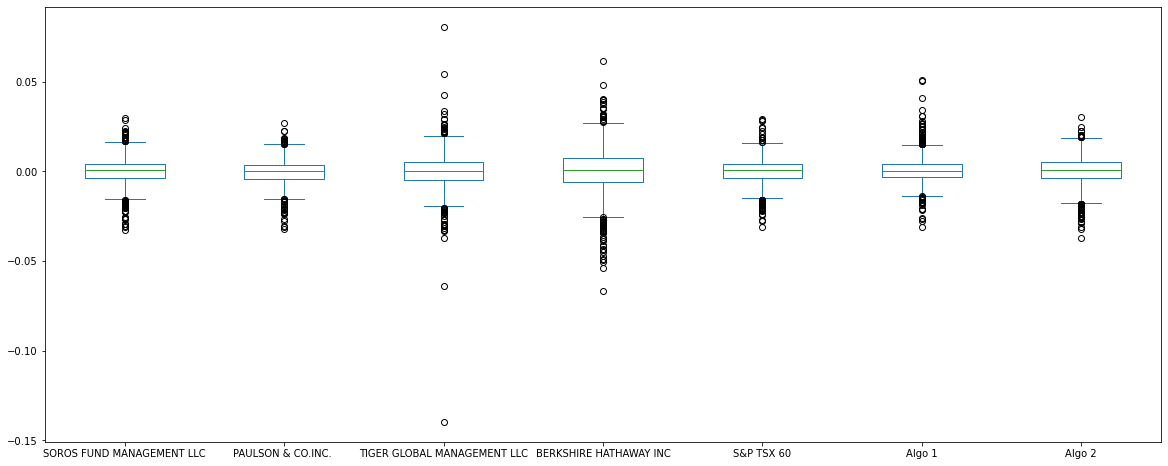

In [1254]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(20,8))

Determine which portfolios are riskier than the S&P TSX 60

In [1255]:
# Calculate  the daily standard deviation of S&P TSX 60
# Determine which portfolios are riskier than the S&P TSX 60
# Every portfolio of Out is riskier than S&P TSX 60
risky = all_returns_daily_std[all_returns_daily_std > all_returns_daily_std["S&P TSX 60"]]
print(risky)

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64


Calculate the Annualized Standard Deviation

In [1256]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_returns_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
S&P TSX 60                     0.111683
Algo 1                         0.120470
Algo 2                         0.132177
dtype: float64

Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

Calculate and plot rolling std for all portfolios with 21-day window

In [1257]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.003368,0.005801,0.005764
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.003318,0.005562,0.005700
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.003352,0.005251,0.005622


<AxesSubplot:xlabel='Date'>

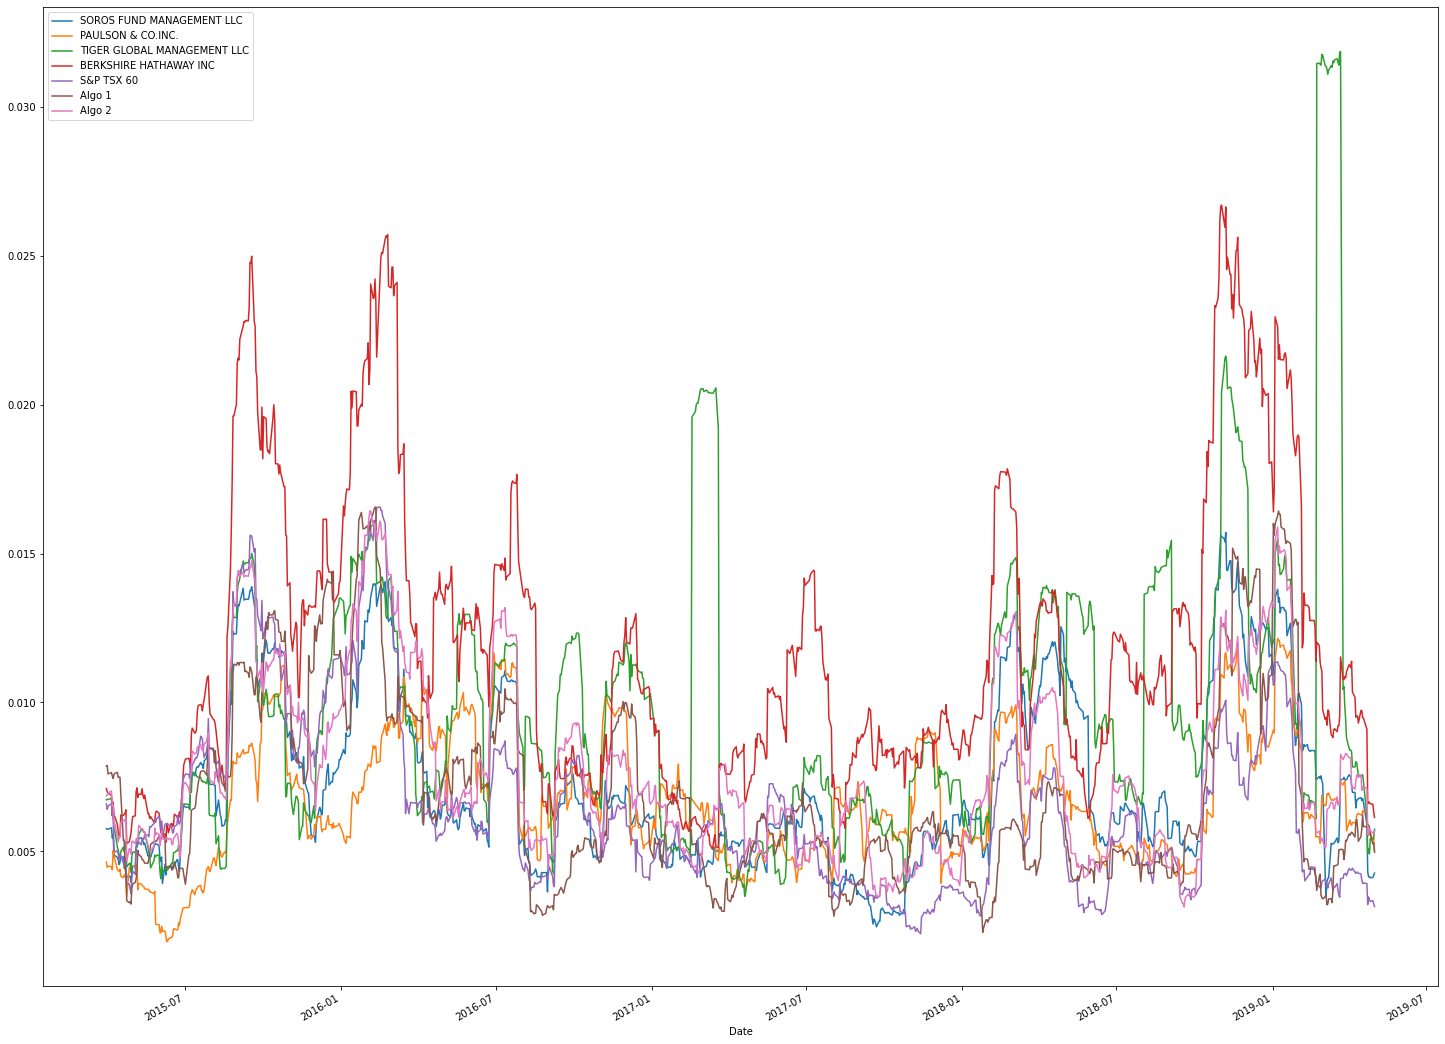

In [1258]:
# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=(25,20))

 Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.674006,0.313795,0.826667
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.486613,0.266363,0.674015
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.440452,0.161236,0.506689
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.557297,0.289378,0.684609
S&P TSX 60,0.674006,0.486613,0.440452,0.557297,1.000000,0.310317,0.737394
Algo 1,0.313795,0.266363,0.161236,0.289378,0.310317,1.000000,0.285455
Algo 2,0.826667,0.674015,0.506689,0.684609,0.737394,0.285455,1.000000


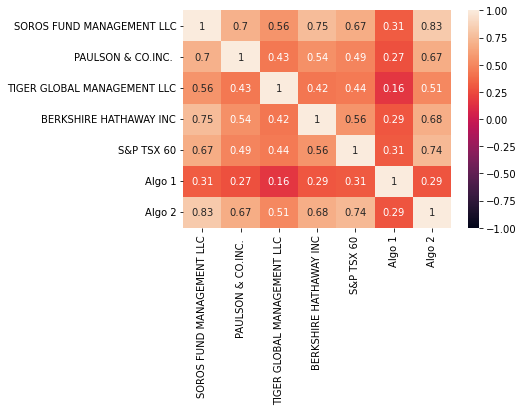

In [1259]:
# Calculate the correlation
import seaborn as sns
correlation = all_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [1260]:
# Calculate covariance of a single portfolio
covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P TSX 60'])
# Calculate variance of S&P TSX
variance = all_returns['S&P TSX 60'].var()
# Computing beta
algo1_beta = covariance / variance
# Plot beta trend
algo1_beta

1.0159578374846112

Rolling Statistics Challenge: Exponentially Weighted Average

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. 

Try calculating the ewm with a 21-day half life for each portfolio, using standard deviation (std) as the metric of interest.

In [1261]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.003686,0.004700,0.002380
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004986,0.004162,0.002662
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.005245,0.003419,0.007166
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.004550,0.002999,0.006290


Sharpe Ratios

In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1262]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
S&P TSX 60                     0.195327
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

<AxesSubplot:>

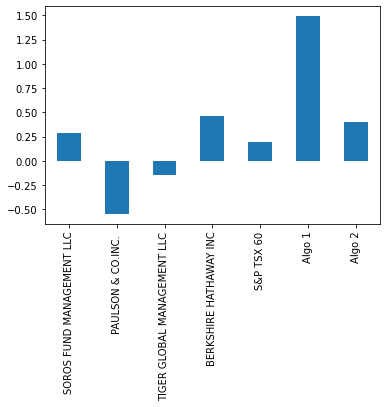

In [1263]:
# Visualize the sharpe ratios as a bar plot
#Algo 1 have a adequate/good Sharpe Ratio
sharpe_ratios.plot.bar()

Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
3. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
4. Include correlation analysis to determine which stocks (if any) are correlated.

Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1264]:
# Reading 1st stock data - TSLA
TSLA_path = Path("./stocks_data - TSLA.csv")
TSLA_pd = pd.read_csv(TSLA_path,index_col="Date", infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
TSLA_pd.head()

,Close
Date,
2015-03-02,39.47
2015-03-03,39.91
2015-03-04,40.49
2015-03-05,40.13
2015-03-06,38.78


In [1265]:
# Reading 2nd stock data - FB
FB_csv = Path("./stocks_data - FB.csv")
FB_pd = pd.read_csv(FB_csv,index_col="Date", infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
FB_pd.head()

,Close
Date,
2015-03-02,79.75
2015-03-03,79.60
2015-03-04,80.90
2015-03-05,81.21
2015-03-06,80.01


In [1266]:
# Reading 3rd stock data - GME
GME_csv = Path("./stocks_data - GME.csv")
GME_pd = pd.read_csv(GME_csv,index_col="Date", infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
GME_pd.head()

,Close
Date,
2015-03-02,38.67
2015-03-03,38.68
2015-03-04,40.03
2015-03-05,40.00
2015-03-06,40.16


In [1267]:
# Combine all stocks in a single DataFrame
# Reorganize portfolio data by having a column per symbol
stocks_portfolio = pd.concat([GME_pd, FB_pd, TSLA_pd], axis="columns", join="inner")
stocks_portfolio.columns = ['FB','GME','TSLA']

In [1268]:
# Reset the index
#stocks_portfolio.reset_index(inplace = True) 
#stocks_portfolio.reset_index(level =["Date"], inplace = True)

stocks_portfolio.head()

,FB,GME,TSLA
Date,,,
2015-03-02,38.67,79.75,39.47
2015-03-03,38.68,79.60,39.91
2015-03-04,40.03,80.90,40.49
2015-03-05,40.00,81.21,40.13
2015-03-06,40.16,80.01,38.78


In [1269]:
# Calculate daily returns
stocks_portfolio_return = stocks_portfolio.sort_index().pct_change() 
stocks_portfolio_return.head()

,FB,GME,TSLA
Date,,,
2015-03-02,NaN,NaN,NaN
2015-03-03,0.000259,-0.001881,0.011148
2015-03-04,0.034902,0.016332,0.014533
2015-03-05,-0.000749,0.003832,-0.008891
2015-03-06,0.004000,-0.014777,-0.033641


In [1270]:
# Drop NAs
# Display sample data
stocks_portfolio_return.dropna(inplace=True)
stocks_portfolio_return.head()

,FB,GME,TSLA
Date,,,
2015-03-03,0.000259,-0.001881,0.011148
2015-03-04,0.034902,0.016332,0.014533
2015-03-05,-0.000749,0.003832,-0.008891
2015-03-06,0.004000,-0.014777,-0.033641
2015-03-09,0.016683,-0.007124,-0.015472


Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1271]:
# Set weights
# Calculate portfolio return
# Display sample data
weights = [1/3, 1/3, 1/3]
weights_portfolio = stocks_portfolio_return.dot(weights)
weights_portfolio.sum()

0.17711299244603418

<AxesSubplot:xlabel='Date'>

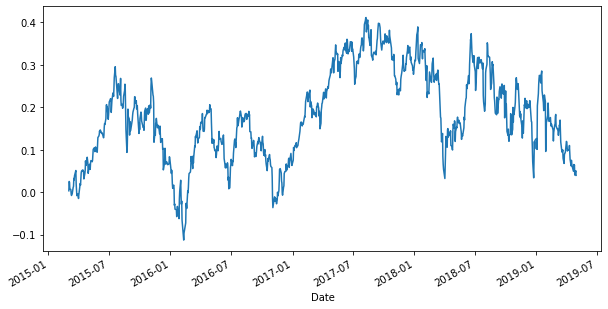

In [1272]:
#calculate and plot cumulative returns
cumulative_returns1 = (1 + weights_portfolio).cumprod()-1
cumulative_returns1.sum()
cumulative_returns1.plot(figsize=(10,5))

Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1273]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_return = pd.concat([weights_portfolio, all_returns], axis='columns', join='inner')   
portfolio_return.rename(columns={0:'STOCKS PORTFOLIO'}, inplace=True)
portfolio_return.head()

,STOCKS PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
Date,,,,,,,,
2015-03-03,0.003175,-0.001266,-0.004981,-0.000496,-0.006569,-0.008582,-0.001942,-0.000949
2015-03-04,0.021922,0.002230,0.003241,-0.002534,0.004213,-0.003370,-0.008589,0.002416
2015-03-05,-0.001936,0.004016,0.004076,0.002355,0.006726,0.001392,-0.000955,0.004323
2015-03-06,-0.014806,-0.007905,-0.003574,-0.008481,-0.013098,-0.009998,-0.004957,-0.011460
2015-03-09,-0.001971,0.000582,0.004225,0.005843,-0.001652,-0.006554,-0.005447,0.001303


In [1274]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_return.dropna(inplace=True)
portfolio_return.head()

,STOCKS PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
Date,,,,,,,,
2015-03-03,0.003175,-0.001266,-0.004981,-0.000496,-0.006569,-0.008582,-0.001942,-0.000949
2015-03-04,0.021922,0.002230,0.003241,-0.002534,0.004213,-0.003370,-0.008589,0.002416
2015-03-05,-0.001936,0.004016,0.004076,0.002355,0.006726,0.001392,-0.000955,0.004323
2015-03-06,-0.014806,-0.007905,-0.003574,-0.008481,-0.013098,-0.009998,-0.004957,-0.011460
2015-03-09,-0.001971,0.000582,0.004225,0.005843,-0.001652,-0.006554,-0.005447,0.001303


Re-run the risk analysis with your portfolio to see how it compares to the others

 Calculate the Annualized Standard Deviation

In [1275]:
# Calculate the annualized `std`
annual_portfolio_std = portfolio_return.std() * np.sqrt(252)
annual_portfolio_std

STOCKS PORTFOLIO               0.255874
SOROS FUND MANAGEMENT LLC      0.124284
PAULSON & CO.INC.              0.110894
TIGER GLOBAL MANAGEMENT LLC    0.172799
BERKSHIRE HATHAWAY INC         0.203657
S&P TSX 60                     0.111712
Algo 1                         0.120528
Algo 2                         0.132188
dtype: float64

Calculate and plot rolling std with 21-day window

In [1276]:
# Calculate rolling standard deviation
portfolio_return.rolling(window=21).std().tail()

,STOCKS PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
Date,,,,,,,,
2019-04-24,0.011010,0.004143,0.005695,0.005088,0.006653,0.003470,0.005889,0.005531
2019-04-25,0.010122,0.004145,0.005572,0.004917,0.006641,0.003368,0.005801,0.005764
2019-04-26,0.011055,0.004117,0.005649,0.005424,0.006599,0.003318,0.005562,0.005700
2019-04-29,0.011350,0.004123,0.005374,0.005438,0.006584,0.003352,0.005251,0.005622
2019-04-30,0.011445,0.004199,0.005408,0.005419,0.006323,0.003239,0.005294,0.005600


<AxesSubplot:xlabel='Date'>

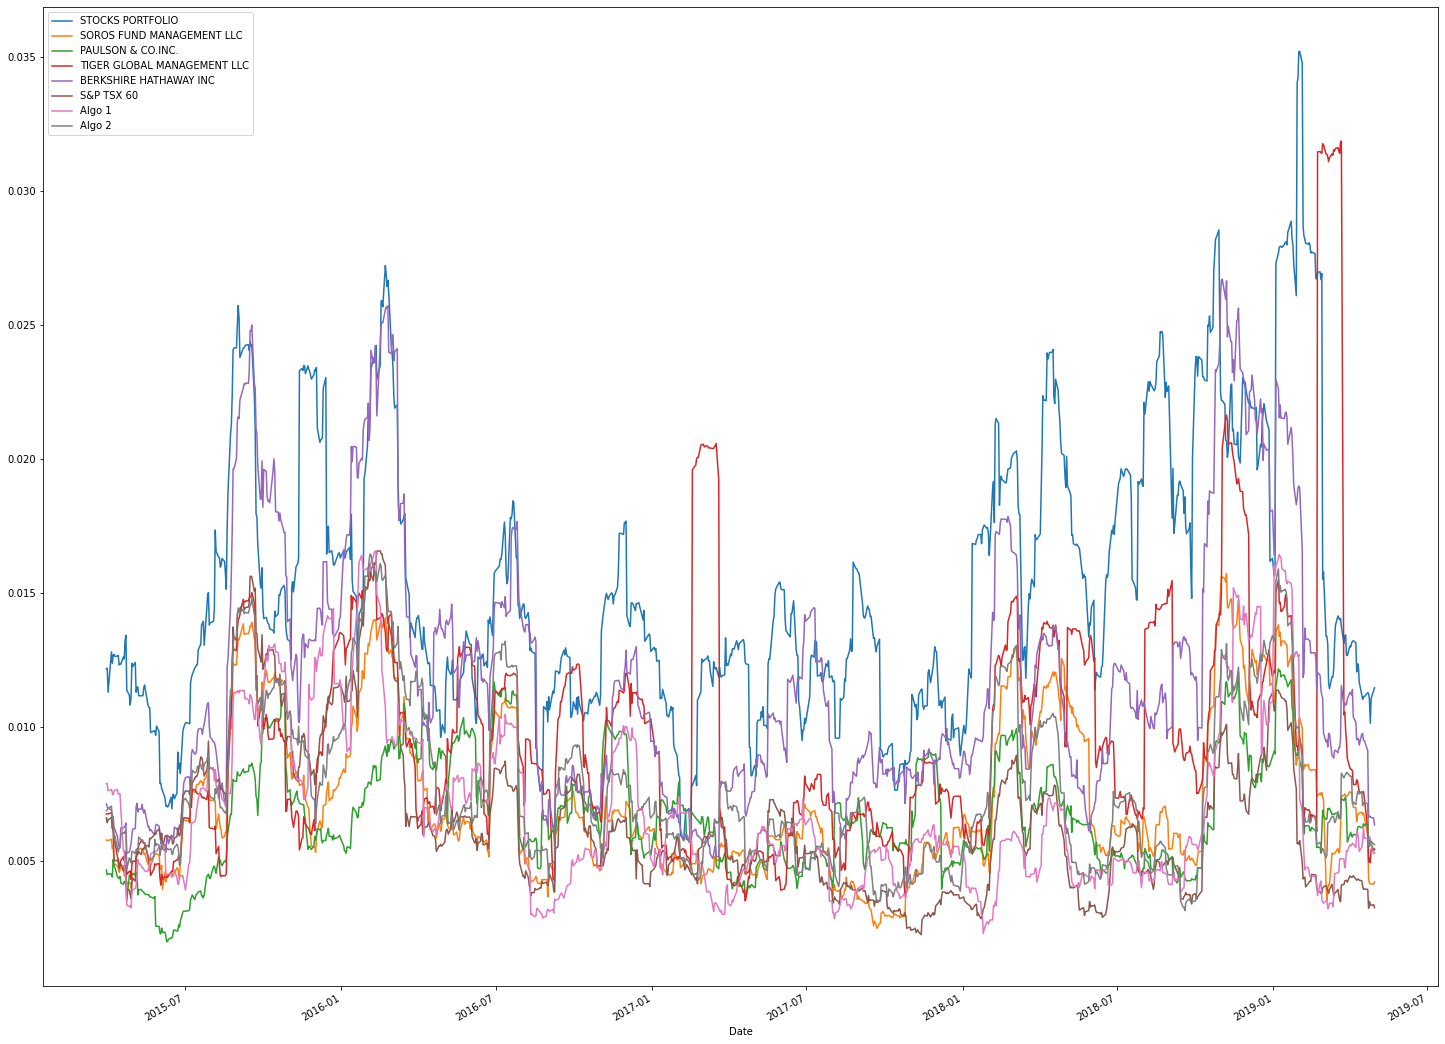

In [1277]:
# Plot rolling standard deviation
portfolio_return.rolling(window=21).std().plot(figsize=(25,20))

 Calculate and plot the correlation

,STOCKS PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2
STOCKS PORTFOLIO,1.000000,0.535610,0.429220,0.360310,0.551880,0.413572,0.180575,0.537664
SOROS FUND MANAGEMENT LLC,0.535610,1.000000,0.697165,0.560729,0.750067,0.673842,0.313825,0.826558
PAULSON & CO.INC.,0.429220,0.697165,1.000000,0.433038,0.540049,0.486624,0.266355,0.674155
TIGER GLOBAL MANAGEMENT LLC,0.360310,0.560729,0.433038,1.000000,0.423267,0.440185,0.161220,0.506383
BERKSHIRE HATHAWAY INC,0.551880,0.750067,0.540049,0.423267,1.000000,0.557109,0.289386,0.684454
S&P TSX 60,0.413572,0.673842,0.486624,0.440185,0.557109,1.000000,0.310334,0.737254
Algo 1,0.180575,0.313825,0.266355,0.161220,0.289386,0.310334,1.000000,0.285499
Algo 2,0.537664,0.826558,0.674155,0.506383,0.684454,0.737254,0.285499,1.000000


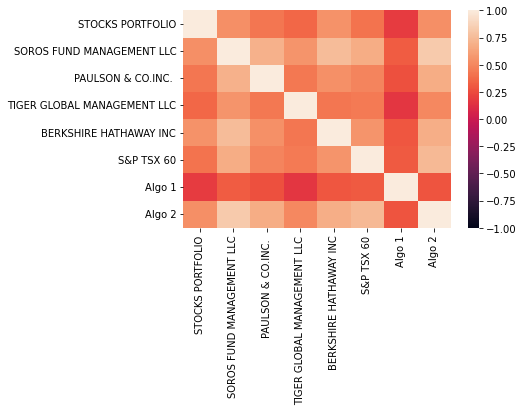

In [1278]:
# Calculate and plot the correlation
correlation = portfolio_return.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [1279]:
# Calculate and plot Beta
covariance = portfolio_return['STOCKS PORTFOLIO'].cov(portfolio_return['S&P TSX 60'])
variance = portfolio_return['S&P TSX 60'].var()
beta = covariance/variance
beta

0.9472773041510364

In [1280]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio2 = (portfolio_return.mean() * 252)/(portfolio_return.std() * np.sqrt(252))
sharpe_ratio2

STOCKS PORTFOLIO               0.124070
SOROS FUND MANAGEMENT LLC      0.298463
PAULSON & CO.INC.             -0.544902
TIGER GLOBAL MANAGEMENT LLC   -0.133303
BERKSHIRE HATHAWAY INC         0.476794
S&P TSX 60                     0.205789
Algo 1                         1.492053
Algo 2                         0.410815
dtype: float64

<AxesSubplot:xlabel='S&P TSX 60', ylabel='STOCKS PORTFOLIO'>

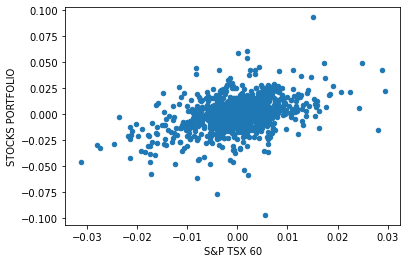

In [1281]:
# Visualize the sharpe ratios as a bar plot
portfolio_return.plot(kind='scatter', x='S&P TSX 60', y='STOCKS PORTFOLIO')

How does your portfolio do?
The S&P TSX 60 have a higher sharpe ratio than the STOCKS PORTFOLIO, what means S&P TSX 60 have better returns relative to the amount of investment risk taken.